In [100]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
wikiurl="https://en.wikipedia.org/wiki/Historical_components_of_the_Dow_Jones_Industrial_Average"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
if response.status_code == 200:
    print("Omega Kilo")
else:
    print("Houston, we have a problem:", response.status_code)

Omega Kilo


In [28]:
print("Scraping tables")
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')
print("Found:", len(tables))

print("\nFiltering for constituents tables by looking for Company or Inc")
tablesFiltered = [table for table in tables if "Company" in table or "Inc" in str(table)]
print("Filtered:", len(tablesFiltered))

Scraping tables
Found: 82

Filtering for constituents tables by looking for Company or Inc
Filtered: 42


In [86]:
print("Scraping dates of the filtered tables")
dates = [pd.to_datetime(table.find_previous_sibling("h2").text.strip("[edit]")) for table in tablesFiltered]
print("Found:", len(dates))

Scraping dates of the filtered tables
Found: 42


In [80]:
constituents = []

for table in tablesFiltered:
    html_table = pd.read_html(str(table))
    df_table = pd.DataFrame(html_table[0].unstack().values)
    constituents.append(df_table)

constituents = pd.concat(constituents, axis=1)
constituents.columns = dates
constituents

,2020-08-31,2020-04-06,2019-04-02,2018-06-26,2018-02-01,2017-09-01,2015-03-19,2013-09-23,2012-09-24,2009-06-08,...,1929-09-14,1929-01-08,1928-10-01,1927-03-16,1925-12-31,1925-12-07,1925-08-31,1924-05-12,1924-02-06,1924-01-22
0,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,...,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation ↑,American Can Company,American Can Company,American Can Company,American Can Company
1,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,Alcoa Inc.,Alcoa Inc.,...,American Can Company,American Can Company,American Can,American Can Company,American Can Company,American Can Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company
2,Amgen Inc. ↑,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc. ↑,AT&T Inc.,American Express Company,American Express Company,...,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company,American Locomotive Company,American Locomotive Company,American Locomotive Company,American Locomotive Company
3,Apple Inc.,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,AT&T Inc.,AT&T Inc.,...,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,American Locomotive Company,American Locomotive Company,American Locomotive Company,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company
4,The Boeing Company,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Bank of America Corporation,Bank of America Corporation,...,American Tobacco Company (B shares),American Tobacco Company (B shares),American Tobacco Company (B shares),American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company
5,Caterpillar Inc.,Chevron Corporation,Chevron Corporation,Chevron Corporation,Chevron Corporation,Chevron Corporation,Chevron Corporation,Chevron Corporation,The Boeing Company,The Boeing Company,...,Atlantic Refining Company,Atlantic Refining Company,Atlantic Refining Company ↑,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,American Telephone and Telegraph Company,American Telephone and Telegraph Company,American Telephone and Telegraph Company,American Telephone and Telegraph Company
6,Chevron Corporation,"Cisco Systems, Inc.","Cisco Systems, Inc.","Cisco Systems, Inc.","Cisco Systems, Inc.","Cisco Systems, Inc.","Cisco Systems, Inc.","Cisco Systems, Inc.",Caterpillar Inc.,Caterpillar Inc.,...,Bethlehem Steel Corporation,Bethlehem Steel Corporation,Bethlehem Steel Corporation ↑,American Telephone and Telegraph Company,American Telephone and Telegraph Company,American Telephone and Telegraph Company,American Tobacco Company (B shares),American Tobacco Company (B shares),American Tobacco Company (B shares),American Tobacco Company (B shares) ↑
7,"Cisco Systems, Inc.",The Coca-Cola Company,The Coca-Cola Company,The Coca-Cola Company,The Coca-Cola Company,The Coca-Cola Company,The Coca-Cola Company,The Coca-Cola Company,Chevron Corporation,Chevron Corporati

Number of the companies doesn't match the expected 30 because of lack of distinction between added ("↑") and removed ("↓") companies. Also some wild "Dropped from average records appeared" - need to clear them too.

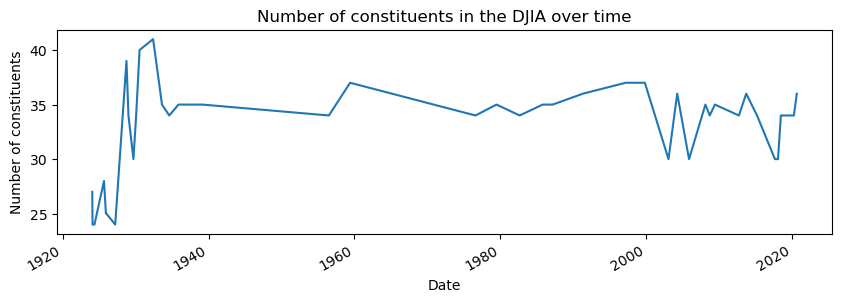

In [94]:
constituents.where(pd.isna, True).where(pd.notna, False).sum().plot(title="Number of constituents in the DJIA over time", ylabel="Number of constituents", xlabel="Date", figsize=(10, 3))
plt.show()

In [129]:
constituents = []

for (table, date) in zip(tablesFiltered, dates):
    html_table = pd.read_html(str(table))
    series = pd.Series(html_table[0].unstack().values, name=date)
    series = series[~((series.str.contains("↓").fillna(False)) | (series.str.contains("Dropped").fillna(False)))].dropna().str.strip(" ↑")
    constituents.append(series)
constituents = pd.concat(constituents, axis=1)

In [131]:
constituents.head()

,2020-08-31,2020-04-06,2019-04-02,2018-06-26,2018-02-01,2017-09-01,2015-03-19,2013-09-23,2012-09-24,2009-06-08,...,1929-09-14,1929-01-08,1928-10-01,1927-03-16,1925-12-31,1925-12-07,1925-08-31,1924-05-12,1924-02-06,1924-01-22
0,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,3M Company,...,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,Allied Chemical and Dye Corporation,American Can Company,American Can Company,American Can Company,American Can Company
1,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,American Express Company,Alcoa Inc.,Alcoa Inc.,...,American Can Company,American Can Company,American Can,American Can Company,American Can Company,American Can Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company
2,Amgen Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,AT&T Inc.,American Express Company,American Express Company,...,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,American Car and Foundry Company,American Car and Foundry Company,American Car and Foundry Company,American Locomotive Company,American Locomotive Company,American Locomotive Company,American Locomotive Company
3,Apple Inc.,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,The Boeing Company,AT&T Inc.,AT&T Inc.,...,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,American Locomotive Company,American Locomotive Company,American Locomotive Company,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company
4,The Boeing Company,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Caterpillar Inc.,Bank of America Corporation,Bank of America Corporation,...,American Tobacco Company (B shares),American Tobacco Company (B shares),American Tobacco Company (B shares),American Smelting & Refining Company,American Smelting & Refining Company,American Smelting & Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company,The American Sugar Refining Company


Way better.

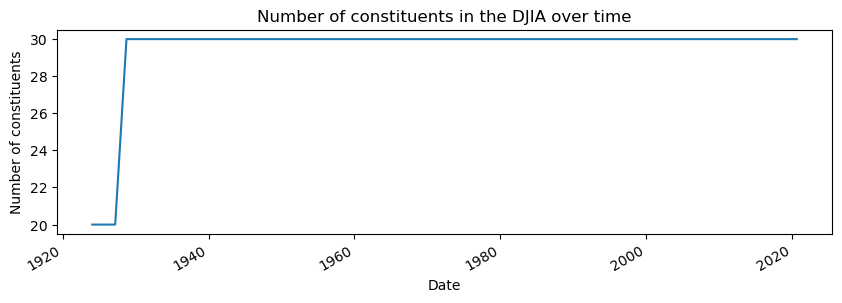

In [132]:
constituents.where(pd.isna, True).where(pd.notna, False).sum().plot(title="Number of constituents in the DJIA over time", ylabel="Number of constituents", xlabel="Date", figsize=(10, 3))
plt.show()

In [134]:
constituents.T.loc["2004":]

/tmp/ipykernel_350722/1441338479.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  constituents.T.loc["2004":]


,0,1,2,3,4,5,6,7,8,9,...,32,33,10,11,22,23,34,35,36,37
2020-08-31,3M Company,American Express Company,Amgen Inc.,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,Dow Inc.,...,Walmart Inc.,The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,Dow Inc.,Exxon Mobil Corporation,...,Walmart Inc.,The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,Dow Inc.,Exxon Mobil Corporation,...,Walmart Inc.,The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-26,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,DowDuPont Inc.,Exxon Mobil Corporation,...,Walmart Inc.,The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,DowDuPont Inc.,Exxon Mobil Corporation,...,NaN,NaN,General Electric Company,"The Goldman Sachs Group, Inc.",The Procter & Gamble Company,"The Travelers Companies, Inc.",NaN,NaN,NaN,NaN
2017-09-01,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,DowDuPont Inc. † (formerly E.I. du Pont de Nem...,Exxon Mobil Corporation,...,NaN,NaN,General Electric Company,"The Goldman Sachs Group, Inc.",The Procter & Gamble Company,"The Travelers Companies, Inc.",NaN,NaN,NaN,NaN
2015-03-19,3M Company,American Express Company,Apple Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,E.I. du Pont de Nemours & Company,Exxon Mobil Corporation,...,"Wal-Mart Stores, Inc.",The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-23,3M Company,American Express Company,AT&T Inc.,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,E.I. du Pont de Nemours & Company,Exxon Mobil Corporation,...,"Wal-Mart Stores, Inc.",The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-24,3M Company,Alcoa Inc.,American Express Company,AT&T Inc.,Bank of America Corporation,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,...,"Wal-Mart Stores, Inc.",The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-08,3M Company,Alcoa Inc.,American Express Company,AT&T Inc.,Bank of America Corporation,The Boeing Company,Caterpillar Inc.,Chevron Corporation,"Cisco Systems, Inc.",The Coca-Cola Company,...,"Wal-Mart Stores, Inc.",The Walt Disney Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
